In [1]:
import os
import sys
home_dir = "../../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
from scipy.stats import spearmanr, pearsonr

import matplotlib.pyplot as plt
%matplotlib inline 

In [6]:
result_df = pd.read_csv(home_dir+"models/sequnet_dunham/outputs/popu_freq_preds_(mut-wt).csv", sep="\t")
print(result_df.shape)
result_df[result_df["mt_freq"]==0.0]

(95211, 14)


,snp_id,chrom_acc_version,chrom_pos,ref_allele,alt_allele,prot_acc_version,prot_pos,wt,mut,wt_population,mut_poulation,wt_freq,mt_freq,pred


In [3]:
print(result_df["mt_freq"].min(), result_df["mt_freq"].max())
processed_result_df = result_df.copy()
processed_result_df["mt_freq"]=(result_df["mt_freq"]-result_df["mt_freq"].min())/(result_df["mt_freq"].max()-result_df["mt_freq"].min())
processed_result_df["pred"]=(result_df["pred"]-result_df["pred"].min())/(result_df["pred"].max()-result_df["pred"].min())

4.873223101026788e-06 0.5


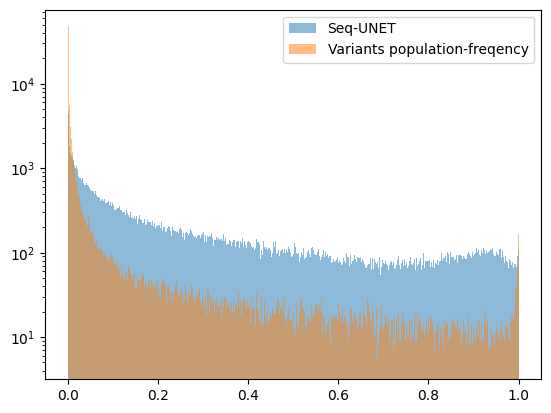

In [4]:
# bins = (np.logspace(0, 1.041392685158225, 500, base=10) - 1) / 10
# plt.hist(processed_result_df["pred"], bins, log=True, density=True, alpha=.5, label="Seq-UNET")
# plt.hist(processed_result_df["mt_freq"], bins, log=True, density=True, alpha=.5, label="Variants population-freqency")
plt.hist(processed_result_df["pred"], bins=500, log=True, alpha=.5, label="Seq-UNET")
plt.hist(processed_result_df["mt_freq"], bins=500, log=True, alpha=.5, label="Variants population-freqency")
plt.legend()
plt.show()

In [5]:
print(spearmanr(result_df["pred"], result_df["mt_freq"]))
print(pearsonr(result_df["pred"], result_df["mt_freq"]))

SignificanceResult(statistic=-0.04112029231141329, pvalue=6.4335957781762084e-37)
PearsonRResult(statistic=-0.025453631021147026, pvalue=3.9909319612927695e-15)


### Amino acid specific analysis

In [6]:
for aa in sorted(result_df["mut"].unique()):
    aa_result_df = result_df[result_df["mut"]==aa]
    print(aa, spearmanr(aa_result_df["pred"], aa_result_df["mt_freq"])[0])

A -0.029689913989336066
C 0.039276086059669445
D -0.06337725345293432
E -0.06371721947907259
F -0.038782795557840914
G -0.03429275954687598
H -0.015277607319736956
I -0.05360327943307657
K -0.0038310505186481656
L -0.05437237333831166
M -0.027281979947798653
N 0.005017169487677549
P -0.1536449237721215
Q -0.015436326359819912
R -0.023835572489228986
S -0.017467843415582846
T -0.07769418221701947
V -0.005197214298622998
W -0.0002581384991329792
Y -0.028146319995598315


### Common, rare and singletons analysis

In [7]:
common = result_df[result_df["mt_freq"]>=.01]
rare = result_df[(result_df["mt_freq"]<.01) & (result_df["mt_freq"]>=.001)]
singletons = result_df[result_df["mut_poulation"]==1]
print(common.shape, rare.shape, singletons.shape)

(18279, 14) (29422, 14) (48483, 14)


In [8]:
print(spearmanr(common["pred"], common["mt_freq"]))
# print(pearsonr(common["pred"], common["mt_freq"]))

print(spearmanr(rare["pred"], rare["mt_freq"]))
# print(pearsonr(rare["pred"], rare["mt_freq"]))

print(spearmanr(singletons["pred"], singletons["mt_freq"]))
# print(pearsonr(singletons["pred"], singletons["mt_freq"]))

SignificanceResult(statistic=-0.021910193200039136, pvalue=0.003052431295205146)
SignificanceResult(statistic=-0.019237401863210664, pvalue=0.0009671020250252508)
SignificanceResult(statistic=-0.00020771899341675656, pvalue=0.9635205373469891)
